In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix 
import pandas as pd

In [2]:
#Load the dataset
iris = pd.read_csv('iris.csv')
df = pd.DataFrame(iris)
display(df)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#define class as dataframe
class_ =  df['class']
predictor = df.iloc[:,0:4].values


In [4]:
#Division of dataset into train and test (70% for training and 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(predictor, class_, test_size = 0.3, random_state = 0)

In [5]:
# Create a K Neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
#Predict the response for test dataset
prediction = knn.predict(x_test)

In [7]:
def confusion(x_train, y_train, x_test, y_test, prediction):
    """This function returns a confusion matrix with the accuracy of the model
       and other metrics 

    Args:
        x_train (_array_): _predictor array used in training_
        y_train (_array_): _class array used in training_
        x_test (_array_): _predictor array used to test_
        y_test (_array_): _class array used to test_
        prediction (_array_): _prediction array from the ML model_
    """
    confusion = confusion_matrix(y_test, prediction)
    ACC = accuracy_score(y_test, prediction)

    #Display the confusion matrix
    conf_image = ConfusionMatrix(KNeighborsClassifier(n_neighbors = 3))
    conf_image.fit(x_train, y_train)
    conf_image.score(x_test, y_test)
    conf_image.poof()
    

    print(f"Accuracy: {ACC*100:.2f} %")
    
    return (ACC)

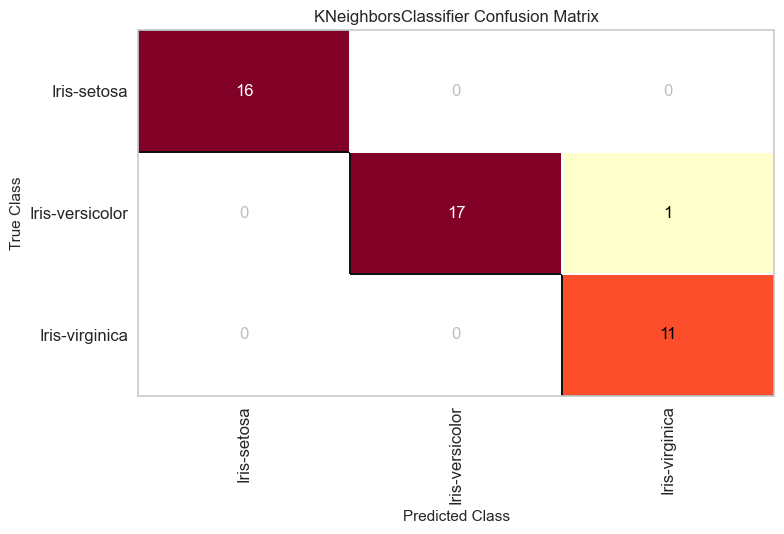

Accuracy: 97.78 %


In [8]:
#Confusion Matrix for the test dataset
ACC  = confusion(x_train, y_train, x_test, y_test, prediction)

PREDICT A NEW CLASS FROM NEW DATA

In [9]:
#Load new dataset 
New_iris = pd.read_csv('New_iris.csv', delimiter= ',')
display(New_iris)

,sepal length,sepal width,petal length,petal width
0,5.5,3.4,1.6,0.3
1,7.3,3.3,4.5,1.5
2,6.0,3.3,6.2,2.3
3,6.0,3.3,4.9,2.0
4,7.0,3.0,6.0,2.1
5,6.0,2.8,4.2,1.7
6,5.7,2.6,3.3,1.1
7,5.5,2.5,3.9,1.0


In [10]:
#Predict species from the input
prediction2 = knn.predict(New_iris)

#Organize predictions in dataFrame
df2 = pd.DataFrame(New_iris)
df2['New_prediction'] = prediction2
display(df2)

c:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,sepal length,sepal width,petal length,petal width,New_prediction
0,5.5,3.4,1.6,0.3,Iris-setosa
1,7.3,3.3,4.5,1.5,Iris-versicolor
2,6.0,3.3,6.2,2.3,Iris-virginica
3,6.0,3.3,4.9,2.0,Iris-virginica
4,7.0,3.0,6.0,2.1,Iris-virginica
5,6.0,2.8,4.2,1.7,Iris-versicolor
6,5.7,2.6,3.3,1.1,Iris-versicolor
7,5.5,2.5,3.9,1.0,Iris-versicolor
